In [48]:
import re
import pandas as pd 
from nltk.corpus import stopwords

In [49]:
data = pd.DataFrame(pd.read_csv("C:/Users/lenovo/Desktop/CENG/#SRC/Machine Learning/datasets/sentimentanalysis.tsv", sep='\t'))
x, comments = 0, []

In [50]:
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

ps = PorterStemmer()
cv = CountVectorizer(max_features = 2500)

In [51]:
while x < 1000:
    comment = re.sub("[^a-zA-Z]"," ",data["Review"][x]).lower().split()
    comment = [ps.stem(word) for word in comment if not word in set(stopwords.words("english"))]
    comment = ' '.join(comment)
    comments.append(comment)
    x += 1

x = cv.fit_transform(comments).toarray()
y = data.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [52]:
from xgboost import XGBClassifier
XGB = XGBClassifier(silent=True, verbosity=0, use_label_encoder=False)

from sklearn.preprocessing import StandardScaler
SCALER = StandardScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)

In [53]:
def classify(MODEL, TITLE):

    MODEL.fit(x_train, y_train)
    y_predicted = MODEL.predict(x_test)

    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.model_selection import cross_val_score

    CM = confusion_matrix(y_test, y_predicted)
    TP = CM[0][0]
    TN = CM[1][1]
    FP = CM[0][1]
    FN = CM[1][0]
    TP_RATE = round(TP/(TP + FN)*100,3)
    FP_RATE = round(FP/(FP + TN)*100,3)
    PRECISION = round(TP/(TP + FN)*100,3)
    RECALL = round(TP/(TP + FP)*100,3)
    F1 = round(2*((PRECISION*RECALL)/(PRECISION+RECALL)),3)

    print(classification_report(y_test,y_predicted))
    CVALIDATION = round(cross_val_score(estimator = MODEL, X = x_train, y = y_train, cv = 4).mean()*100,3)
    print(f'{TITLE}\nCross Validation: %{CVALIDATION}\nTrue Positive Rate: %{TP_RATE} | False Positive Rate: %{FP_RATE}\nAccuracy: %{round(accuracy_score(y_test, y_predicted)*100,3)} | Precision: %{RECALL} | Recall: %{PRECISION} | F1 Score: %{F1}')
    
    plt.figure(figsize=(16,10),dpi=80)
    CM = ConfusionMatrixDisplay(CM)
    CM.plot()        
    plt.show()

              precision    recall  f1-score   support

           0       0.62      0.81      0.71       143
           1       0.76      0.55      0.64       157

    accuracy                           0.68       300
   macro avg       0.69      0.68      0.67       300
weighted avg       0.70      0.68      0.67       300

XGBoost Classifier
Cross Validation: %72.571
True Positive Rate: %62.366 | False Positive Rate: %23.684
Accuracy: %67.667 | Precision: %81.119 | Recall: %62.366 | F1 Score: %70.517


<Figure size 1280x800 with 0 Axes>

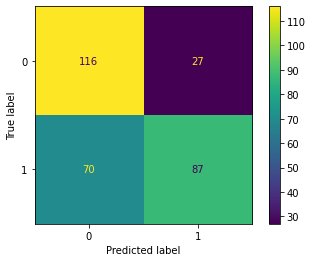

In [54]:
classify(XGB, 'XGBoost Classifier')